<a href="https://colab.research.google.com/github/Pranav2290/Real-World-Data-Cleaning-Validation-Pipeline/blob/main/Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Created messy data using ChatGPT (50000, 14)**

In [2]:
import pandas as pd
import numpy as np
import random

np.random.seed(42)

ROWS = 50000

def random_date(start, end):
    return start + pd.to_timedelta(
        np.random.randint(0, (end - start).days), unit="D"
    )

data = {
    "customer_id": np.random.randint(10000, 20000, ROWS),

    "age": np.random.choice(
        [*range(-5, 100), None, "", "NA"],
        ROWS
    ),

    "gender": np.random.choice(
        ["Male", "male", "M", "Female", "female", "F", "Unknown", "", None],
        ROWS
    ),

    "monthly_income_usd": np.random.choice(
        [*range(500, 20000), -1000, 999999, None, "unknown"],
        ROWS
    ),

    "debt_to_income_ratio": np.random.choice(
        [0, *np.round(np.random.uniform(0, 150, 200), 2), None, "NA"],
        ROWS
    ),

    "credit_score": np.random.choice(
        [*range(250, 900), 1000, -50, None],
        ROWS
    ),

    "has_loan": np.random.choice(
        ["Yes", "No", "yes", "no", True, False, 1, 0, None],
        ROWS
    ),

    "loan_amount": np.random.choice(
        [0, *range(1000, 50000), -5000, 1000000, None],
        ROWS
    ),

    "savings_usd": np.random.choice(
        [0, *range(0, 100000), None, -2000, 5000000],
        ROWS
    ),

    "city": np.random.choice(
        ["New York", "new york ", "NY", "Los Angeles", "LA", "los angeles", "", None],
        ROWS
    ),

    "signup_date": np.random.choice(
        ["2022-01-15", "15-02-2022", "03/10/2021", None, "invalid_date"],
        ROWS
    ),

    "last_transaction_date": np.random.choice(
        ["2023-06-01", "01/07/2023", None, "NA", "32-13-2022"],
        ROWS
    ),

    "review_text": np.random.choice(
        ["Great service", " late delivery ", "", None, "OK", "Very bad experience"],
        ROWS
    ),

    "risk_flag": np.random.choice(
        ["Low", "Medium", "High", "high", "LOW", None],
        ROWS
    )
}

df_dirty = pd.DataFrame(data)

print(df_dirty.shape)
df_dirty.head()

(50000, 14)


,customer_id,age,gender,monthly_income_usd,debt_to_income_ratio,credit_score,has_loan,loan_amount,savings_usd,city,signup_date,last_transaction_date,review_text,risk_flag
0,17270,21,None,679,81.3,464,Yes,15612,5796,los angeles,2022-01-15,32-13-2022,Very bad experience,Medium
1,10860,31,female,15199,19.35,294,No,30153,10856,NY,None,01/07/2023,OK,None
2,15390,-3,F,3575,62.56,557,no,15418,22506,New York,03/10/2021,2023-06-01,Very bad experience,LOW
3,15191,70,male,15838,118.5,330,yes,14341,46080,LA,15-02-2022,32-13-2022,Very bad experience,high
4,15734,1,None,4085,118.79,353,yes,16038,37910,,None,NA,Great service,LOW


# 1) **UNDERSTANDING DATA**

In [3]:
df_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   customer_id            50000 non-null  int64 
 1   age                    49538 non-null  object
 2   gender                 44554 non-null  object
 3   monthly_income_usd     49997 non-null  object
 4   debt_to_income_ratio   49796 non-null  object
 5   credit_score           49920 non-null  object
 6   has_loan               44464 non-null  object
 7   loan_amount            50000 non-null  object
 8   savings_usd            50000 non-null  object
 9   city                   43744 non-null  object
 10  signup_date            39941 non-null  object
 11  last_transaction_date  39939 non-null  object
 12  review_text            41671 non-null  object
 13  risk_flag              41545 non-null  object
dtypes: int64(1), object(13)
memory usage: 5.3+ MB


In [4]:
df_dirty.describe(include='all')

,customer_id,age,gender,monthly_income_usd,debt_to_income_ratio,credit_score,has_loan,loan_amount,savings_usd,city,signup_date,last_transaction_date,review_text,risk_flag
count,50000.000000,49538.0,44554,49997.0,49796.00,49920.0,44464,50000.0,50000.0,43744,39941,39939,41671,41545
unique,NaN,107.0,8,18009.0,201.00,652.0,6,31371.0,39289.0,7,4,4,5,5
top,NaN,-4.0,Male,11637.0,65.06,424.0,False,46873.0,92706.0,,2022-01-15,NA,,Low
freq,NaN,510.0,5681,11.0,485.00,115.0,11158,7.0,5.0,6352,10107,10142,8409,8379
mean,14988.011440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2887.910142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,12483.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,14991.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,17489.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_dirty.isna().mean().sort_values(ascending=False)

,0
last_transaction_date,0.20122
signup_date,0.20118
risk_flag,0.16910
review_text,0.16658
city,0.12512
has_loan,0.11072
gender,0.10892
age,0.00924
debt_to_income_ratio,0.00408
credit_score,0.00160


In [7]:
df_dirty.head(3)

,customer_id,age,gender,monthly_income_usd,debt_to_income_ratio,credit_score,has_loan,loan_amount,savings_usd,city,signup_date,last_transaction_date,review_text,risk_flag
0,17270,21,None,679,81.3,464,Yes,15612,5796,los angeles,2022-01-15,32-13-2022,Very bad experience,Medium
1,10860,31,female,15199,19.35,294,No,30153,10856,NY,None,01/07/2023,OK,None
2,15390,-3,F,3575,62.56,557,no,15418,22506,New York,03/10/2021,2023-06-01,Very bad experience,LOW


# 2) **DATA TYPE FIXING**
We only convert types + create NaNs where data is invalid.

In [8]:
df = df_dirty.copy()

# 1. change customer_id to string
df['customer_id'] = df['customer_id'].astype(str)

In [9]:
# 2. age to flot
df['age'].describe()

df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [10]:
# 3. monthly_income_usd to numeric
df['monthly_income_usd'] = pd.to_numeric(df['monthly_income_usd'], errors='coerce')

In [11]:
# 4. debt_to_income_ratio to numeric
df['debt_to_income_ratio'] = pd.to_numeric(df['debt_to_income_ratio'], errors='coerce')

In [12]:
# 5. credit_score to numeric
df['credit_score'] = pd.to_numeric(df['credit_score'], errors='coerce')

In [13]:
# 6. fix has loan to bool
df['has_loan'].unique()

array(['Yes', 'No', 'no', 'yes', None, False, True], dtype=object)

In [14]:
df['has_loan'] = df['has_loan'].replace({
    'Yes':True,
    'yes':True,
    'No':False,
    'no':False,
    1:True,
    0:False
})

df['has_loan'] = df['has_loan'].astype('boolean')

In [15]:
# 7. loan_amount to numeric
df['loan_amount'] = pd.to_numeric(df['loan_amount'], errors='coerce')

In [16]:
# 8. savings_usd to numeric
df['savings_usd'] = pd.to_numeric(df['savings_usd'], errors='coerce')

In [17]:
# 9. clean gender feature
df['gender'] = (
    df['gender']
    .str.strip()
    .str.lower()
    .replace({
        'm':'male',
        'f':'female'
    })
)

In [18]:
df['gender'].unique()

array([None, 'female', 'male', '', 'unknown'], dtype=object)

In [19]:
# 10. Fix city feature
df['city'].unique()

array(['los angeles', 'NY', 'New York', 'LA', '', 'new york ', None,
       'Los Angeles'], dtype=object)

In [20]:
df['city'] = (
    df['city']
    .str.strip()
    .str.lower()
    .replace({
        'ny':'new york',
        'la':'los angeles'
    })
)

### Dates fixing

In [21]:
# signup_date
df['signup_date'] = pd.to_datetime(df['signup_date'], errors='coerce', dayfirst=True)

/tmp/ipython-input-3598165779.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['signup_date'] = pd.to_datetime(df['signup_date'], errors='coerce', dayfirst=True)


In [22]:
# last_transaction_date
df['last_transaction_date'] = pd.to_datetime(df['last_transaction_date'], errors='coerce', dayfirst=True)

/tmp/ipython-input-3745992990.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_transaction_date'] = pd.to_datetime(df['last_transaction_date'], errors='coerce', dayfirst=True)


### review_text

In [23]:
df['review_text'] = (
    df['review_text']
    .str.lower()
    .fillna('')
    .astype(str)
)

### risk_flag

In [24]:
df['risk_flag'] = (
    df['risk_flag']
    .str.strip()
    .str.lower()

)

# 3) **MISSING VALUE HANDALING**

In [25]:
# 1. measure missingness
missing_pct = df.isna().mean().sort_values(ascending=False) * 100
missing_pct

,0
signup_date,79.786
last_transaction_date,60.374
risk_flag,16.910
city,12.512
has_loan,11.072
gender,10.892
age,2.814
debt_to_income_ratio,0.900
credit_score,0.160
monthly_income_usd,0.012


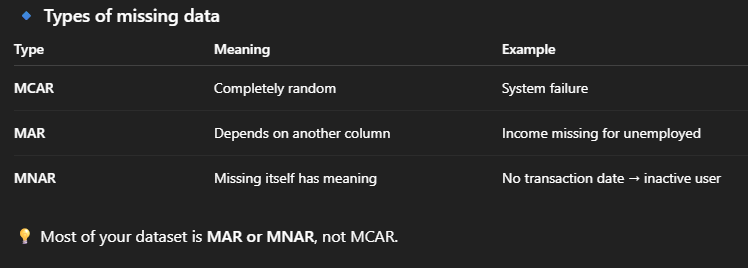

In [26]:
# 2. age
df['age'].describe()  # distribution is skewed

df['age'] = df['age'].fillna(df['age'].median()) # userd median becuase it is resistant to outliers

In [27]:
df['age'].describe()

,age
count,50000.000000
mean,46.972900
std,30.027163
min,-5.000000
25%,21.000000
50%,47.000000
75%,73.000000
max,99.000000


In [28]:
# 2. Monthly_income
df['monthly_income_usd'].describe() #

,monthly_income_usd
count,49994.000000
mean,10320.168000
std,10487.006046
min,-1000.000000
25%,5390.000000
50%,10241.000000
75%,15088.750000
max,999999.000000


In [29]:
df['monthly_income_usd'] = df['monthly_income_usd'].fillna(df['monthly_income_usd'].median())

In [30]:
# ckeck distribution after filling nulls
df['monthly_income_usd'].describe()

,monthly_income_usd
count,50000.00000
mean,10320.15850
std,10486.37683
min,-1000.00000
25%,5390.75000
50%,10241.00000
75%,15088.00000
max,999999.00000


In [31]:
# 3. debt to income ratio
df['debt_to_income_ratio'].describe() # if the person dont have loan then ratio would be zero

,debt_to_income_ratio
count,49550.000000
mean,73.426837
std,43.833042
min,0.000000
25%,36.310000
50%,70.720000
75%,113.590000
max,149.940000


In [32]:
# fill it with zero means no debt
df['debt_to_income_ratio'] = df['debt_to_income_ratio'].fillna(0)

In [33]:
# 4. credit score
# we can't fill NaN in credit score because it depends on many factors, we cant guess, it is riski

In [34]:
# 5. has_loan
# if loan info missing assume No loan means false
df['has_loan'] =  df['has_loan'].fillna(False)

In [35]:
df['has_loan'].value_counts()

,count
has_loan,
False,27798
True,22202


In [36]:
# 6. loan_amount
# it is depend upon has_loan if has_loan is false then loan_amount would be zero
df.loc[df['has_loan'] == False, 'loan_amount'] = 0

In [37]:
# 7. savings
# in sevings 0 is valid
df['savings_usd'] = df['savings_usd'].fillna(0)

In [38]:
# 7. city
# dont guess the city make it unknown
df['city'] = df['city'].fillna('unknown')

In [39]:
# 8. dates
# we can't assume about the dates stay is as it id NaT.

In [40]:
# 9. review_text
# there is no nulls

### 10. Risk_flag (target veriable)

In [41]:
# We drop the row if there is a null data point in risk_flag,
# because it is the final decision column, we can't fill it by guess
# total rows now = 50000, risk_flag = 41545

df = df.dropna(subset=['risk_flag'])

df.shape # 8455 rows are droped

(41545, 14)

# 4) **BUSINESS RULES & INVALID VALUE FIXING**

In [42]:
df.loc[ (df['age'] < 18) , 'age']
df.loc[ df['age'] > 99, 'age']

,age


In [43]:
# I change data points to nan rather than dropping them (keep maximum data)
# 1. Age can't be below 18 or above 100 in business logic
df.loc[(df['age'] < 18 ) | (df['age'] > 100), 'age'] = np.nan # don't remove, assign nan
# before 41454 rows
# now 32661

In [44]:
# 2. Monthly income cant -ve
df.loc[(df['monthly_income_usd'] <= 0), 'monthly_income_usd'] = np.nan

In [45]:
df.loc[df['monthly_income_usd'] <= 0, 'monthly_income_usd'].count()

np.int64(0)

In [46]:
# 3. debt_to_income range 0 to 100, so above 100 and below 0 = nan
df.loc[
    (df['debt_to_income_ratio'] < 0) |
    (df['debt_to_income_ratio'] > 100),
    'debt_to_income_ratio'
] = np.nan

In [47]:
# 4. credit_score valid range: 300 – 850
df.loc[(df['credit_score'] < 300), 'credit_score'].count() #3179
df.loc[(df['credit_score'] > 850), 'credit_score'].count() #3206

df.loc[
    (df['credit_score'] < 300) |
    (df['credit_score'] > 850),
    'credit_score'
] = np.nan

In [48]:
# 5. loan_amount can't be -ve
df.loc[ df['loan_amount'] < 0, 'loan_amount'].count() # 0 rows

# still check
df.loc[(df['loan_amount'] < 0), 'loan_amount'] = np.nan

In [49]:
# 6. savings can't be -ve
df.loc[df['savings_usd'] < 0, 'savings_usd'] # 0 rows

,savings_usd


In [50]:
# 7. last_transaction_ date not < signup_date
invalid_date = df['last_transaction_date'] < df['signup_date']

df.loc[invalid_date, 'last_transaction_date'] = pd.NaT # Not a Time(NaT) more specific than nan

In [51]:
# 8. In risk_flag only tree categorical values(high, medium, low) else nan
df['risk_flag'].unique()

df.loc[~df['risk_flag'].isin(['low','medium','high']), 'risk_flag'] = np.nan

In [52]:
# check nulls
df.describe(include='all')

,customer_id,age,gender,monthly_income_usd,debt_to_income_ratio,credit_score,has_loan,loan_amount,savings_usd,city,signup_date,last_transaction_date,review_text,risk_flag
count,41545,32661.000000,37020,41543.000000,28431.000000,35097.000000,41545,41545.000000,41545.000000,41545,8381,16487,41545,41545
unique,9823,NaN,4,NaN,NaN,NaN,2,NaN,NaN,4,NaN,NaN,5,3
top,18998,NaN,female,NaN,NaN,NaN,False,NaN,NaN,new york,NaN,NaN,,high
freq,13,NaN,13892,NaN,NaN,NaN,23095,NaN,NaN,15710,NaN,NaN,13897,16644
mean,NaN,58.133064,NaN,10304.521700,48.042378,576.127247,NaN,11322.006619,49813.401733,NaN,2022-01-15 00:00:00.000000256,2023-06-15 23:56:04.177836800,NaN,NaN
min,NaN,18.000000,NaN,501.000000,0.000000,300.000000,NaN,0.000000,12.000000,NaN,2022-01-15 00:00:00,2023-06-01 00:00:00,NaN,NaN
25%,NaN,39.000000,NaN,5387.000000,23.380000,439.000000,NaN,0.000000,24642.000000,NaN,2022-01-15 00:00:00,2023-06-01 00:00:00,NaN,NaN
50%,NaN,57.000000,NaN,10216.000000,49.280000,577.000000,NaN,0.000000,49593.000000,NaN,2022-01-15 00:00:00,2023-06-01 00:00:00,NaN,NaN
75%,NaN,79.000000,NaN,15081.000000,73.010000,714.000000,NaN,22338.000000,74839.000000,NaN,2022-01-15 00:00:00,2023-07-01 00:00:00,NaN,NaN
max,NaN,99.000000,NaN,999999.000000,99.610000,850.000000,NaN,49999.000000,99998.000000,NaN,2022-01-15 00:00:00,2023-07-01 00:00:00,NaN,NaN


In [53]:
#check null %
df.isna().mean().sort_values(ascending=False) * 100

,0
signup_date,79.826694
last_transaction_date,60.315321
debt_to_income_ratio,31.565772
age,21.384041
credit_score,15.520520
gender,10.891804
monthly_income_usd,0.004814
customer_id,0.000000
has_loan,0.000000
loan_amount,0.000000


# **DUPLICATES & RECORD INTEGRITY**

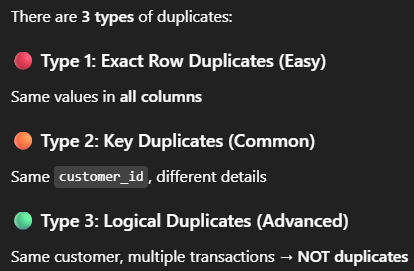

In [54]:
# 1. ckeck exact duplicate rows
df.duplicated().sum() # 0

# if exist
df = df.drop_duplicates()

### duplicate customer_id

In [55]:
# check duplicate customer_id
df['customer_id'].duplicated().sum() # number is high 31722


np.int64(31722)

In [56]:
# inspect duplicate records
df[df['customer_id'].duplicated(keep=False)].sort_values('customer_id').head(5)

,customer_id,age,gender,monthly_income_usd,debt_to_income_ratio,credit_score,has_loan,loan_amount,savings_usd,city,signup_date,last_transaction_date,review_text,risk_flag
40081,10000,63.0,female,4930.0,99.61,608.0,True,17487.0,70176,unknown,NaT,2023-06-01,ok,high
31812,10000,95.0,female,3091.0,NaN,698.0,True,49361.0,24162,los angeles,NaT,2023-06-01,great service,medium
24058,10000,79.0,female,2185.0,11.11,403.0,True,30630.0,44313,,NaT,2023-07-01,,low
15191,10000,94.0,None,5895.0,NaN,592.0,False,0.0,82719,unknown,NaT,NaT,ok,low
44543,10000,47.0,male,18128.0,NaN,NaN,True,46593.0,48433,new york,NaT,NaT,,medium


keep the most recent and most complete record per customer

In [57]:
# for most complete create new feature missing_count (completeness score)

df['missing_count'] = df.isna().sum(axis=1) # axis 1 = row, axis 0 = column (means row wise null count(sum))

# lower the missing count = better row than other

### Sort record by priority
priority order:

1.   customer_id
2.   latest transaction_date
3.   fewer missing values (missing_count)



In [58]:
df = df.sort_values(
    by=['customer_id','last_transaction_date','missing_count'],
    ascending=[True,False,True]
)

In [59]:
# keep only one record per customer
df = df.drop_duplicates(subset=['customer_id'], keep='first')

In [60]:
# now check duplicate count with customer_id
df['customer_id'].duplicated().sum() # 0 duplicate

np.int64(0)

In [61]:
# before deleting the duplicate customer_id we have 41545 records
# now we have 9823
# 31,722 rows were extra records belonging to customers who appeared more than once

In [62]:
# remore missing_count feature
df = df.drop(columns=['missing_count'])

In [63]:
# final integrity check
df['customer_id'].is_unique

True

In [64]:
df.shape

(9823, 14)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9823 entries, 24058 to 43396
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            9823 non-null   object        
 1   age                    8299 non-null   float64       
 2   gender                 9015 non-null   object        
 3   monthly_income_usd     9823 non-null   float64       
 4   debt_to_income_ratio   7401 non-null   float64       
 5   credit_score           8710 non-null   float64       
 6   has_loan               9823 non-null   boolean       
 7   loan_amount            9823 non-null   float64       
 8   savings_usd            9823 non-null   int64         
 9   city                   9823 non-null   object        
 10  signup_date            2562 non-null   datetime64[ns]
 11  last_transaction_date  8049 non-null   datetime64[ns]
 12  review_text            9823 non-null   object        
 13  ris

# 5) **OUTLIERS (DETECT ▸ DECIDE ▸ TREAT)**

### 1. Identify numeric columns

In [66]:
num_cols = [
    'age',
    'monthly_income_usd',
    'debt_to_income_ratio',
    'credit_score',
    'loan_amount',
    'savings_usd'
]

### 2. visual detection (always to first)

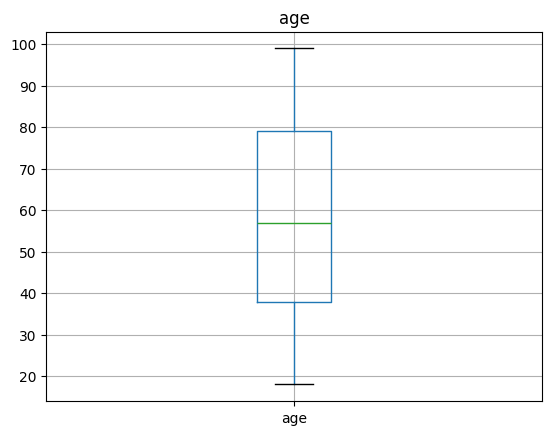

---------------------------------------------


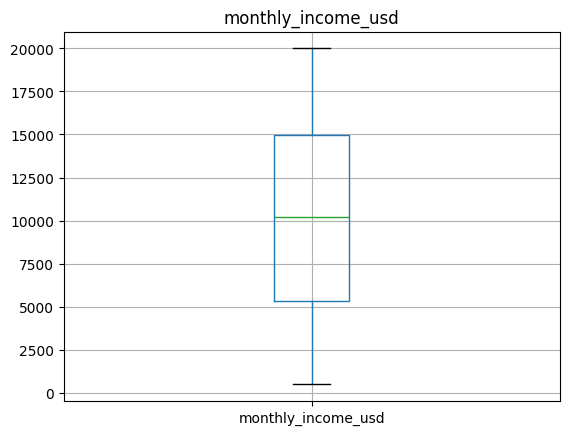

---------------------------------------------


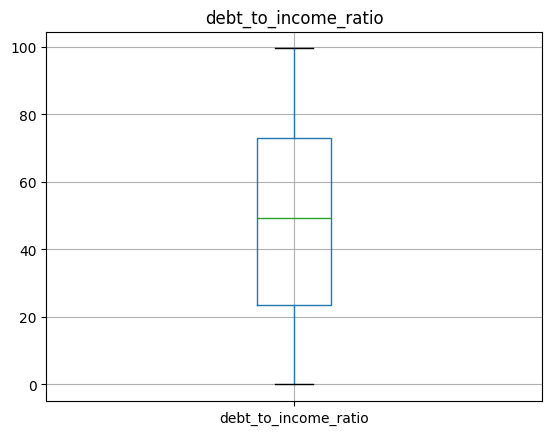

---------------------------------------------


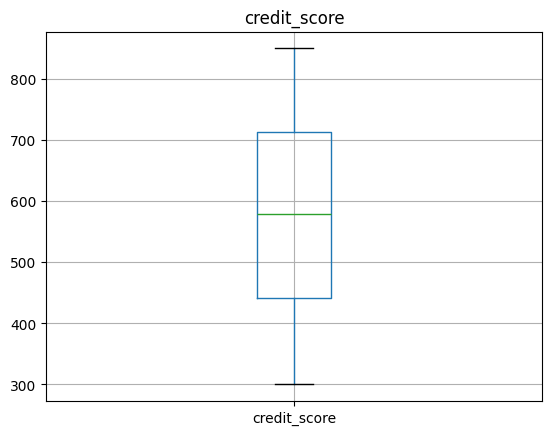

---------------------------------------------


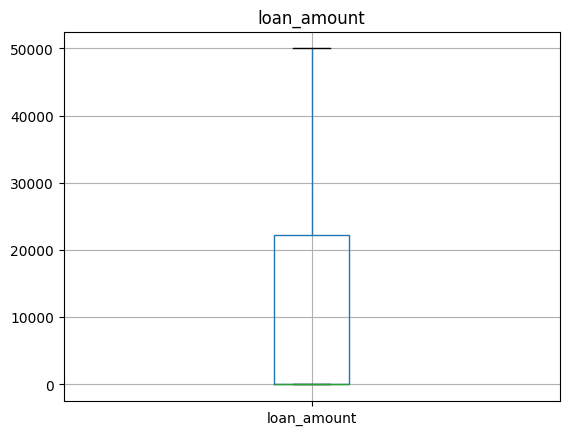

---------------------------------------------


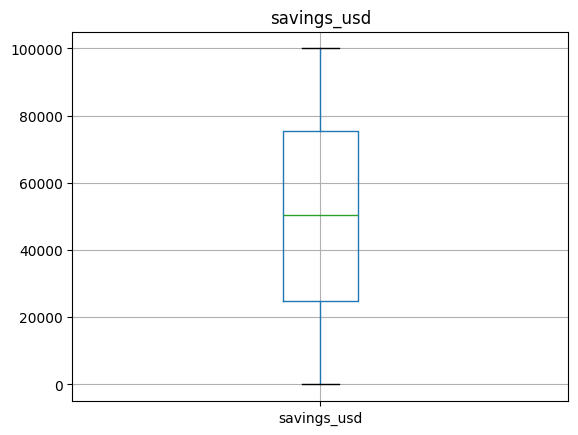

---------------------------------------------


In [67]:
import matplotlib.pyplot as plt

for col in num_cols:
  plt.figure()
  df.boxplot(column=col)
  plt.title(col)
  plt.show()
  print('---------------------------------------------')

### 3. Statistical Detection — IQR Method (Standard)

Function to calculate outlier bounds

In [68]:
def iqr_bounds(series):
  Q1 = series.quantile(0.25)
  Q3 = series.quantile(0.75)
  IQR = Q3 - Q1
  return Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

### 4.Column-by-Column Decisions

In [118]:
def iqr_bounds(series):
  Q1 = series.quantile(0.25)
  Q3 = series.quantile(0.75)
  IQR = Q3 - Q1
  return Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

# 1. age
low, high = iqr_bounds(df['age'])

df.loc[(df['age'] < low) | (df['age'] > high), 'age'] = np.nan


In [70]:
# 2. monthly income
"""Observation:
Heavy right skew
Some people genuinely earn more
Decision:
❌ Do NOT delete
✅ Cap (Winsorize)
"""
def iqr_bounds(series):
  Q1 = series.quantile(0.25)
  Q3 = series.quantile(0.75)
  IQR = Q3 - Q1
  return Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

low, high = iqr_bounds(df['monthly_income_usd'])
df['monthly_income_usd'] = df['monthly_income_usd'].clip(lower=low, upper=high)



In [71]:
# 3. debt_to_income_ratio
# it is already bounded (0-100)

In [72]:
# 4. credit_score
# already set in range

In [73]:
# 5. loan_amount
'''
Observation:
Some extreme loans
Business-relevant
Decision:
✅ Cap upper bound
'''
def iqr_bounds(series):
  Q1 = series.quantile(0.25)
  Q3 = series.quantile(0.75)
  IQR = Q3 - Q1
  return Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

low, high = iqr_bounds(df['loan_amount'])

df['loan_amount'] = df['loan_amount'].clip(upper=high)

In [74]:
# 6. savings
'''
Observation:
Extreme values
Skewed
Decision:
✅ Cap upper bound
'''
def iqr_bounds(series):
  Q1 = series.quantile(0.25)
  Q3 = series.quantile(0.75)
  IQR = Q3 - Q1
  return Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

low, high = iqr_bounds(df['savings_usd'])
df['savings_usd'] = df['savings_usd'].clip(upper=high)


In [75]:
df[num_cols].describe()

,age,monthly_income_usd,debt_to_income_ratio,credit_score,loan_amount,savings_usd
count,8299.000000,9823.000000,7401.000000,8710.000000,9823.000000,9823.000000
mean,58.075913,10218.749669,48.315066,577.236854,11243.820829,50317.841698
std,23.550943,5584.161819,28.806639,158.871342,15800.100911,28905.782563
min,18.000000,501.000000,0.000000,300.000000,0.000000,22.000000
25%,38.000000,5360.000000,23.470000,441.000000,0.000000,24921.500000
50%,57.000000,10217.000000,49.360000,579.000000,0.000000,50416.000000
75%,79.000000,14994.000000,73.010000,713.000000,22211.000000,75377.500000
max,99.000000,19998.000000,99.610000,850.000000,49994.000000,99983.000000


In [76]:
df['age'].describe()

,age
count,8299.000000
mean,58.075913
std,23.550943
min,18.000000
25%,38.000000
50%,57.000000
75%,79.000000
max,99.000000


# 6) **CATEGORICAL CLEANING & FINAL VALIDATION**

In [77]:
cat_col = [
    'gender',
    'city',
    'risk_flag'
]

1. gender

In [78]:
df['gender'].unique()

array(['female', 'unknown', 'male', '', None], dtype=object)

In [79]:
# keep only male, female, unknow
df['gender'] = df['gender'].fillna('unknown')

df.loc[~df['gender'].isin(['male','female','unknown']), 'gender'] = 'unknown'

2. city

In [80]:
df['city'].unique()

array(['', 'los angeles', 'new york', 'unknown'], dtype=object)

In [81]:
# keep LA, NY, unknown
df['city'] = df['city'].fillna('unknown')

df.loc[(df['city'] == ''), 'city'] = 'unknown'

3. risk_flag (target veriable)

In [82]:
df['risk_flag'].unique()

array(['low', 'high', 'medium'], dtype=object)

In [83]:
df = df[df['risk_flag'].isin(['low','high','medium'])]

In [84]:
# convert categorical feature to category dtype
for col in cat_col:
  df[col] = df[col].astype('category')

## Text Cleaning (review_text)

In [85]:
df['review_text'] = (
    df['review_text']
    .str.strip()
    .str.lower()
)

In [86]:
# regex
df['review_text'] = (
    df['review_text']
    .str.replace(r'[^a-z\s]','', regex=True)
)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9823 entries, 24058 to 43396
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            9823 non-null   object        
 1   age                    8299 non-null   float64       
 2   gender                 9823 non-null   category      
 3   monthly_income_usd     9823 non-null   float64       
 4   debt_to_income_ratio   7401 non-null   float64       
 5   credit_score           8710 non-null   float64       
 6   has_loan               9823 non-null   boolean       
 7   loan_amount            9823 non-null   float64       
 8   savings_usd            9823 non-null   int64         
 9   city                   9823 non-null   category      
 10  signup_date            2562 non-null   datetime64[ns]
 11  last_transaction_date  8049 non-null   datetime64[ns]
 12  review_text            9823 non-null   object        
 13  ris

In [88]:
df['customer_id'].is_unique

True

In [89]:
df

,customer_id,age,gender,monthly_income_usd,debt_to_income_ratio,credit_score,has_loan,loan_amount,savings_usd,city,signup_date,last_transaction_date,review_text,risk_flag
24058,10000,79.0,female,2185.0,11.11,403.0,True,30630.0,44313,unknown,NaT,2023-07-01,,low
17806,10001,77.0,unknown,4567.0,80.39,360.0,False,0.0,79932,los angeles,2022-01-15,2023-07-01,great service,low
4006,10002,NaN,female,9188.0,NaN,NaN,True,18633.0,96705,los angeles,NaT,2023-06-01,very bad experience,high
25281,10003,48.0,female,18677.0,24.02,645.0,True,6152.0,37108,new york,NaT,2023-06-01,very bad experience,high
378,10004,47.0,male,736.0,74.27,741.0,True,26061.0,23289,los angeles,2022-01-15,2023-07-01,,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17651,19995,NaN,female,9788.0,29.56,367.0,True,3326.0,87932,new york,NaT,2023-07-01,,high
9504,19996,47.0,unknown,6745.0,5.42,735.0,True,34590.0,5281,los angeles,NaT,2023-06-01,,medium
45697,19997,42.0,male,12587.0,70.72,685.0,True,41299.0,59467,new york,NaT,2023-07-01,very bad experience,high
28234,19998,NaN,male,7369.0,22.11,577.0,False,0.0,88091,los angeles,2022-01-15,2023-07-01,great service,high


# 7) **Business rule re-validation**

In [116]:
assert df['age'].between(18,100).any() # not all() because column contain NaN's
# I use any() because when I used all() it gave error, because I have NaN in between that range
# for all() menase every single value must me true.
assert df['monthly_income_usd'].min() > 0
assert df['debt_to_income_ratio'].between(0, 100).any()
assert df['credit_score'].between(300,850).any()

In [107]:
df.loc[(df['debt_to_income_ratio'] < 0) | (df['debt_to_income_ratio'] > 100), 'debt_to_income_ratio']

,debt_to_income_ratio


In [113]:
assert df['age'].between(18,100).all()

AssertionError: 

In [109]:
df.loc[(df['age'] > 100) | (df['age'] < 18), 'age']

,age


In [117]:
df['customer_id'].is_unique

True